<a href="https://colab.research.google.com/github/SirineMaaroufi/Task2-TSF-Data-Science-Internship/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation: Data Science and Business Analytics Internship**
# **GRIP: May 2022**
### **Task 1 : Prediction using Unsupervised ML**
Problem: 

*   Predict the optimum number of clusters and represent it visually
*   The dataset consists of three types of flowers namely Iris-setosa, Iris-versicolor, and Iris-virginica.

### Author: Sirine Maàroufi

## Importing Libraries

In this step, we will import the required libraries.




In [2]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Load Data

In this step, we will import the data.

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data imported successfully")
iris_df.head()


Data imported successfully


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding The optimum number of clusters

Before clustering the data using K-Means, we need to specify the number of clusters. To do so, there are various methods like the Elbow Method and the Silhouette Method.

In this task, we're going to use the elbow mathod.

### The Elbow Method

The Elbow Method is a popular technique for determining the optimal number of clusters. Here, we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for various values of k and choose the k for which WSS (The WSS score is the summation of Squared Errors for all given data points) first starts to diminish. In the plot of WSS-versus-k, this can be observed as an elbow.

We calculate the WCSS for K=2 to k=10 and calculate the WCSS in each iteration.

In [4]:
K=range(2,8)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(iris_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

Let us now plot the WCSS vs K cluster graph. It can be seen below that there is an elbow bend at K=3 i.e. it is the point after which WCSS does not diminish much with the increase in value of K.

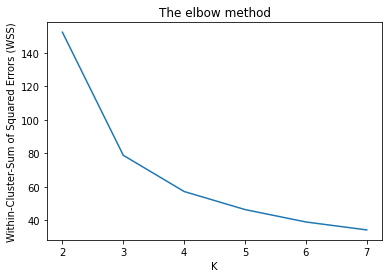

In [5]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.title('The elbow method')
plt.plot(K,wss)

## Applying K-Means with 3 clusters

In [ ]:
kmeans = cluster.KMeans(n_clusters=3)
x = iris_df.iloc[:, [0, 1, 2, 3]].values
kmeans = kmeans.fit(iris_df)
y_kmeans= kmeans.predict(x)

## Visualizing the clusters

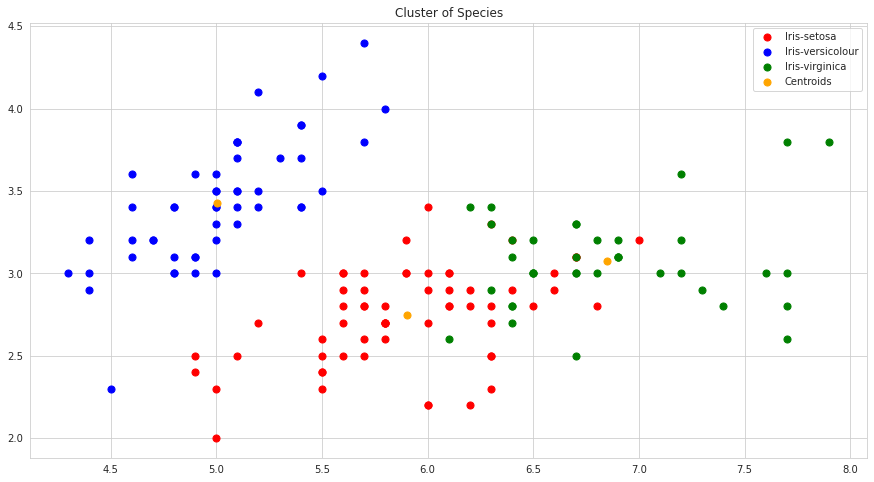

In [7]:
iris['Clusters'] = kmeans.labels_
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))

#Visualizing the clusters on the first 2 columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'orange', label = 'Centroids')
plt.title('Cluster of Species')
plt.legend()
plt.show()